In [1]:
import numpy as np
import gate_operations as go
import qutip as qt
import random
from functools import reduce

from scipy.sparse import lil_array
from scipy.sparse import csr_matrix
import scipy.sparse

import matplotlib.pyplot as plt

# Visualized Single Qubit Transformations



True


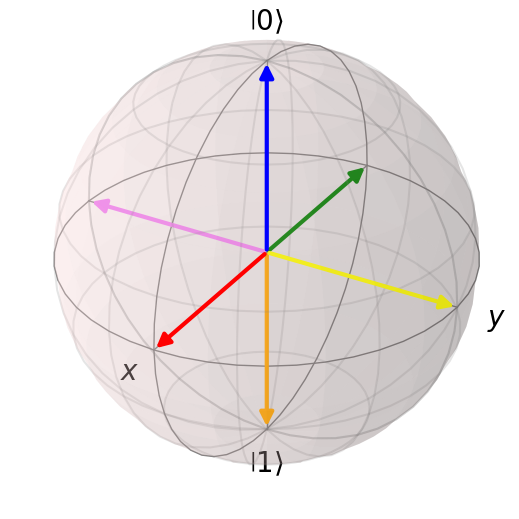

In [2]:
# INPUT SPACE
state = np.array([1,0])

print(state.shape == (2,))

assure_normalization = True




# create plot
bloch_sphere = qt.Bloch()

if assure_normalization:
    state = go.normalization_check(state)

# SEQUENCE
go.plot_bloch_state(state, bloch_sphere, "blue")

state = go.gate_operation(state, go.H())

go.plot_bloch_state(state, bloch_sphere, "red")

state = go.gate_operation(state, go.R_z(np.pi/2))
state = go.gate_operation(state, go.R_x(np.pi))

go.plot_bloch_state(state, bloch_sphere, "violet")

state = go.gate_operation(state, go.R_x(np.pi/2))
state = go.gate_operation(state, go.R_y(np.pi/2))

go.plot_bloch_state(state, bloch_sphere, "green")

state = go.gate_operation(state, go.R_z(-np.pi/2))

go.plot_bloch_state(state, bloch_sphere, "yellow")

state = go.gate_operation(state, go.R(np.array([1,0,0]),-np.pi/2))

go.plot_bloch_state(state, bloch_sphere, "orange")




bloch_sphere.show()


# Generating specific states

### Bell states

$\begin{aligned}
    \ket{\Phi^+} &= \frac{\ket{00} + \ket{11}}{\sqrt{2}} \ \ \ \ \ \ket{\Phi^-} &= \frac{\ket{00} - \ket{11}}{\sqrt{2}} \\[8pt]
    \ket{\Psi^+} &= \frac{\ket{01} + \ket{10}}{\sqrt{2}} \ \ \ \ \ \ket{\Psi^-} &= \frac{\ket{01} - \ket{10}}{\sqrt{2}} \\
\end{aligned}$

In [3]:
# Gates
H1 = go.single_qubit_gate_to_full_gate(go.H(), 2, 1)
CNOT12 = go.CNOT(2,1,2)
X1 = go.single_qubit_gate_to_full_gate(go.X(), 2, 1)
X2 = go.single_qubit_gate_to_full_gate(go.X(), 2, 2)

phi_plus  = np.array([1,0,0,0])
phi_plus = go.gate_operation(phi_plus, H1)
phi_plus = go.gate_operation(phi_plus, CNOT12)

print("Phi+ = " + str(phi_plus))

phi_minus  = np.array([1,0,0,0])
phi_minus = go.gate_operation(phi_minus, X1)
phi_minus = go.gate_operation(phi_minus, H1)
phi_minus = go.gate_operation(phi_minus, CNOT12)

print("Phi- = " + str(phi_minus))

psi_plus  = np.array([1,0,0,0])
psi_plus = go.gate_operation(psi_plus, X2)
psi_plus = go.gate_operation(psi_plus, H1)
psi_plus = go.gate_operation(psi_plus, CNOT12)

print("Psi+ = " + str(psi_plus))

psi_minus  = np.array([1,0,0,0])
psi_minus = go.gate_operation(psi_minus, X1)
psi_minus = go.gate_operation(psi_minus, X2)
psi_minus = go.gate_operation(psi_minus, H1)
psi_minus = go.gate_operation(psi_minus, CNOT12)

print("Psi+ = " + str(psi_minus))



Phi+ = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Phi- = [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
Psi+ = [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
Psi+ = [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]


### Greenberger–Horne–Zeilinger state

$\ket{\text{GHZ}} = \frac{\ket{000} + \ket{111}}{\sqrt{2}}$

In [4]:
# Gates
H1 = go.single_qubit_gate_to_full_gate(go.H(), 3, 1)
CNOT12 = go.CNOT(3,1,2)
CNOT23 = go.CNOT(3,2,3)

GHZ = np.zeros((2**3,))
GHZ[0] = 1

GHZ = go.gate_operation(GHZ, H1)
GHZ = go.gate_operation(GHZ, CNOT12)
GHZ = go.gate_operation(GHZ, CNOT23)

print("GHZ = " + str(GHZ))

GHZ = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


# Instructional Syntax

### Single Instruction

In [5]:
state = np.array([2,4,3,0.1])
state = go.normalization_check(state)

instruction = go.instruction("CNOT",[1,2]) # Directly create instruction object

state1 = go.gate_operation(state, go.CNOT(2,1,2))
state2 = go.apply_instruction(state, instruction, 2)

print(state1)
print(state2)

[0.37132666 0.74265332 0.01856633 0.55698999]
[0.37132666 0.74265332 0.01856633 0.55698999]


### Instruction List

In [6]:
state = np.array([random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)])
state = go.normalization_check(state)

gate = go.single_qubit_gate_to_full_gate(go.H(),2,1)
state1 = go.gate_operation(state, gate)

inst = go.instruction.create_from_list(["H",[1]]) # Create instruction objects automatically from list syntax
state2 = go.apply_instruction(state, inst, 2)

print(state1)
print(state2)

[ 0.18668855+0.j  0.97709208+0.j -0.07538211+0.j  0.06896364+0.j]
[ 0.18668855+0.j  0.97709208+0.j -0.07538211+0.j  0.06896364+0.j]


In [7]:
state = np.array([random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)])
state = go.normalization_check(state)

gate1 = go.single_qubit_gate_to_full_gate(go.H(),2,1)
gate2 = go.single_qubit_gate_to_full_gate(go.X(),2,2)
instructions = go.create_instruction_list([["H",[1]],["X",[2]]]) # create list of instruction objects from list syntax
 
state1 = go.gate_operation(state, gate1)
state1 = go.gate_operation(state1, gate2)
state2 = reduce(go.apply_instruction, instructions, state)  # apply list of instructions

print(state1)
print(state2)

[ 0.13663437+0.j  0.95940085+0.j -0.04747458+0.j -0.24213059+0.j]
[ 0.13663437+0.j  0.95940085+0.j -0.04747458+0.j -0.24213059+0.j]


In [8]:
state = np.array([random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)])
state = go.normalization_check(state)

# Computation with direct gate functions
gate1 = go.single_qubit_gate_to_full_gate(go.H(),3,1)
gate2 = go.single_qubit_gate_to_full_gate(go.X(),3,2)
gate3 = go.single_qubit_gate_to_full_gate(go.R_x(np.pi),3,2)
gate4 = go.CNOT(3,2,1)
gate5 = go.single_qubit_gate_to_full_gate(go.R(np.array([0,1,0]),np.pi),3,3)
gate6 = go.single_qubit_gate_to_full_gate(go.T(),3,1)
gate7 = go.single_qubit_gate_to_full_gate(go.T(),3,2)
gate8 = go.single_qubit_gate_to_full_gate(go.T(),3,3)

state1 = go.gate_operation(state, gate1)
state1 = go.gate_operation(state1, gate2)
state1 = go.gate_operation(state1, gate3)
state1 = go.gate_operation(state1, gate4)
state1 = go.gate_operation(state1, gate5)
state1 = go.gate_operation(state1, gate6)
state1 = go.gate_operation(state1, gate7)
state1 = go.gate_operation(state1, gate8)


# Computation with instruction list and multiple instructions
instructions = go.create_instruction_list([["H",[1]],
                                           ["X",[2]],
                                           ["Rx",[2],np.pi],
                                           ["CNOT",[2,1]],
                                           ["R",[3],np.pi,np.array([0,1,0])],
                                           ["T",[1,2,3]]])

state2 = reduce(go.apply_instruction, instructions, state)

print(state1)
print(state2)

print("Are they the same?")
print(np.allclose(state1,state2))

[-1.34106994e-17+4.93846397e-01j  2.05298759e-01-2.05298759e-01j
  4.60904546e-02-4.60904546e-02j -9.61581461e-03-3.46944695e-18j
  1.06238794e-01-1.06238794e-01j -5.56743801e-02+0.00000000e+00j
 -2.19013342e-01-2.77555756e-17j  5.44903481e-01+5.44903481e-01j]
[-1.34106994e-17+4.93846397e-01j  2.05298759e-01-2.05298759e-01j
  4.60904546e-02-4.60904546e-02j -9.61581461e-03-3.81932376e-18j
  1.06238794e-01-1.06238794e-01j -5.56743801e-02-2.96410260e-18j
 -2.19013342e-01-3.95834030e-17j  5.44903481e-01+5.44903481e-01j]
Are they the same?
True


### Random Instructions

In [9]:
random_instruction = go.instruction.random_instruction(5) # create any random instruction

print(vars(random_instruction))

{'gate': 'CNOT', 'qubit': [3, 2], 'direction': array([0, 0, 1]), 'angle': 0.0, 'probability': 1.0}


In [10]:
random_instruction = go.instruction.random_single_qubit_instruction(5) # create any single qubit random instruction

print(vars(random_instruction))

{'gate': 'T', 'qubit': [2], 'direction': array([0, 0, 1]), 'angle': 0.0, 'probability': 1.0}


In [11]:
random_instruction = go.instruction.chunked_random_instruction(10,3) # create any random instruction, but with separate chunks of unentangled qubits

print(vars(random_instruction))

{'gate': 'T', 'qubit': [9], 'direction': array([0, 0, 1]), 'angle': 0.0, 'probability': 1.0}


# Benchmark (1000 random gates)

On my system:
| Qubits | (old) only dense matrices [s]  | Using internal sparse [s] |  
|------|-----|-----|
| 1 | 0.0 | 0.0 |
| 2 | 0.1 | 0.1 |  
| 3 | 0.1 | 0.1 |
| 4 | 0.1 | 0.2 |
| 5 | 0.2 | 0.2 |
| 6 | 0.3 | 0.3 |
| 7 | 0.6 | 0.6 |
| 8 | 2.9 | 3.6 |
| 9 | 15.9 | 7.9 | 
| 10 | 81.6 | 28.2 | 
| 11 | 422.4 | 115.2 | 

In [12]:
qubit_amount = 3


# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1

for gate_number in range(0,1000):
    state = go.apply_instruction(state, go.instruction.random_instruction(qubit_amount), qubit_amount)

print(state)

[ 0.47307741+0.05301294j  0.40076332-0.1711269j   0.21347992+0.07131219j
 -0.22324229+0.10184302j -0.24290815-0.23417155j  0.13333406+0.54925468j
 -0.00048949+0.02701216j -0.18216104+0.07356366j]


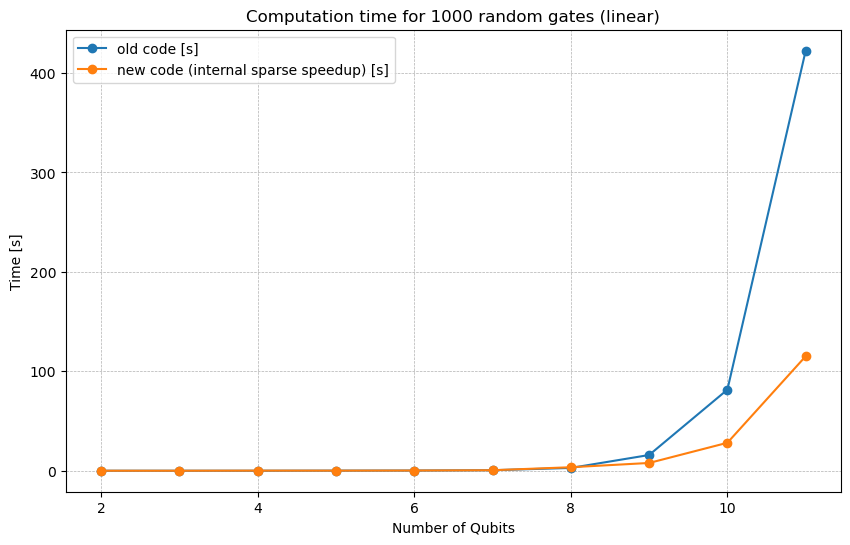

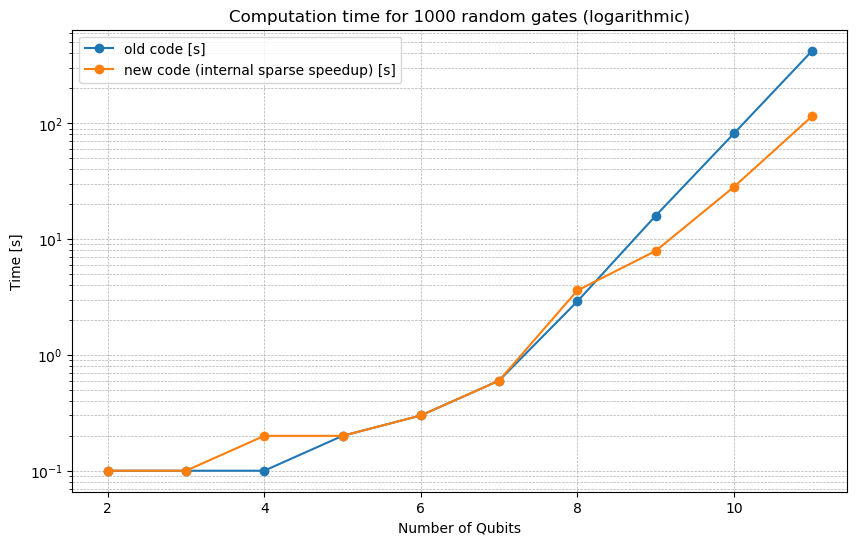

In [13]:

# Data from the table
qubits = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
old_code = [0.1, 0.1, 0.1, 0.2, 0.3, 0.6, 2.9, 15.9, 81.6, 422.4]
sparse_speedup = [0.1, 0.1, 0.2, 0.2, 0.3, 0.6, 3.6, 7.9, 28.2, 115.2]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(qubits, old_code, marker='o', label='old code [s]')
plt.plot(qubits, sparse_speedup, marker='o', label='new code (internal sparse speedup) [s]')

# Customize the plot
plt.title("Computation time for 1000 random gates (linear)")
plt.xlabel("Number of Qubits")
plt.ylabel("Time [s]")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# Show the plot
plt.show()


# another log plot
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(qubits, old_code, marker='o', label='old code [s]')
plt.plot(qubits, sparse_speedup, marker='o', label='new code (internal sparse speedup) [s]')

# Customize the plot
plt.title("Computation time for 1000 random gates (logarithmic)")
plt.xlabel("Number of Qubits")
plt.ylabel("Time [s]")

plt.yscale("log")  # Using logarithmic scale for better visibility of differences

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# Show the plot
plt.show()


# Using scipy.sparse

In [14]:
qubit_amount = random.randint(1, 6)

# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1
        
# non sparse
Y = go.single_qubit_gate_to_full_gate(go.Y(), qubit_amount, random.randint(1, qubit_amount))
        
# sparse transformation
Y_sparse = csr_matrix(Y)
state_sparse = csr_matrix(state.T)

sol1 = go.gate_operation(state, Y)

sol2 = go.gate_operation(state_sparse, Y_sparse)
        
#convert sparse back 
sol2 = sol2.toarray().T
      
compare = np.allclose(sol1,sol2)

print("Same solution?")
print(compare)
    

Same solution?
True


Calculations are done automatically with sparse matrices when using the instruction syntax and providing the state as a scipy csr_matrix

In [15]:
qubit_amount = 2

# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1
state_sparse = csr_matrix(state) # transform into csr_matrix 

for gate_number in range(0,1000):
    instr = go.instruction.random_instruction(qubit_amount)
    
    state = go.apply_instruction(state, instr , qubit_amount) # this uses mostly dense matrices
    state_sparse = go.apply_instruction(state_sparse, instr , qubit_amount) # this uses only sparse matrices

compare = np.allclose(state,state_sparse.toarray().T)

print(state)
print(state_sparse.toarray().T)
print("Are they the same?")
print(compare)


[ 0.22012756+0.16200661j  0.05757582+0.12437963j -0.50522811+0.42687514j
  0.64106715+0.24097205j]
[[ 0.22012756+0.16200661j  0.05757582+0.12437963j -0.50522811+0.42687514j
   0.64106715+0.24097205j]]
Are they the same?
True


## Benchmarks

### 1000 random gates

On my system:
| Qubits | All gates [s] | Single Qubit gates [s] | Chunked gates (3) [s] |
|------|-----|-----| -----|
| 1 | 0.1 | 0.1 | 0.1 |
| 2 | 0.5 | 0.4 | 0.5 |
| 3 | 0.8 | 0.6 | 0.6 |
| 4 | 1.0 | 0.8 | 1.1 |
| 5 | 1.3 | 1.1 | 1.5 |
| 6 | 1.7 | 1.4 | 1.8 |
| 7 | 2.1 | 1.6 | 2.1 |
| 8 | 2.7 | 2.3 | 2.8 |
| 9 | 5.4 | 5.5 | 5.5 |
| 10 | 16.7 | 19.0 | 16.9 |
| 11 | 66.4 | 78.2 | 56.5 |
| 12 | 254.0 | 264.6 | 222.5 |

In [16]:
qubit_amount = 5

# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1
state_sparse = csr_matrix(state)

for gate_number in range(0,1000):
    instr = go.instruction.random_instruction(qubit_amount)

    state_sparse = go.apply_instruction(state_sparse, instr , qubit_amount)

print(state_sparse.toarray().T)

[[-0.12032939+0.1644178j   0.09377217-0.11936376j -0.03446702+0.06110592j
  -0.05396577-0.08378991j  0.12391079+0.04698881j  0.04392092-0.11371402j
  -0.04548061-0.15979942j -0.16813556-0.02038723j -0.13274296+0.13563375j
   0.09949537+0.02077609j -0.15627493-0.27180487j -0.13497603+0.09547219j
   0.10548271+0.05334839j -0.11838992-0.12904324j -0.12932409-0.19285855j
   0.04799164+0.00355914j  0.07035563-0.16955767j -0.16174335+0.14115916j
  -0.23191805+0.17912783j  0.08209569+0.19380996j -0.10279386-0.16611219j
  -0.08850491+0.16680993j  0.11018469-0.02321953j -0.02178943+0.12752929j
  -0.11464157-0.05292895j  0.1308741 +0.21119345j  0.09958856+0.01959025j
   0.12908195-0.02921655j  0.00528991+0.06256586j  0.00115599+0.13215731j
   0.06163884-0.08134188j  0.18046331-0.27557291j]]


In [17]:
qubit_amount = 3

# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1
state_sparse = csr_matrix(state)

for gate_number in range(0,1000):
    instr = go.instruction.random_single_qubit_instruction(qubit_amount)

    state_sparse = go.apply_instruction(state_sparse, instr , qubit_amount)

print(state_sparse.toarray().T)

[[ 0.63707587-0.30013744j  0.29730436+0.24987386j -0.22812801-0.01655748j
  -0.04433258-0.11808908j -0.38682548-0.21920265j  0.02056304-0.24432842j
   0.07455599+0.12367155j -0.04474805+0.0658746j ]]


In [18]:
qubit_amount =  3

# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1
state_sparse = csr_matrix(state)

for gate_number in range(0,1000):
    instr = go.instruction.chunked_random_instruction(qubit_amount,3)

    state_sparse = go.apply_instruction(state_sparse, instr , qubit_amount)

print(state_sparse.toarray().T)

[[ 0.05125397-0.47130033j  0.2437362 +0.00894285j -0.04876071-0.00165039j
   0.33210266-0.40555092j  0.01726939-0.1725013j   0.06429391-0.22597576j
   0.42727998+0.35325971j -0.0137297 +0.21404409j]]


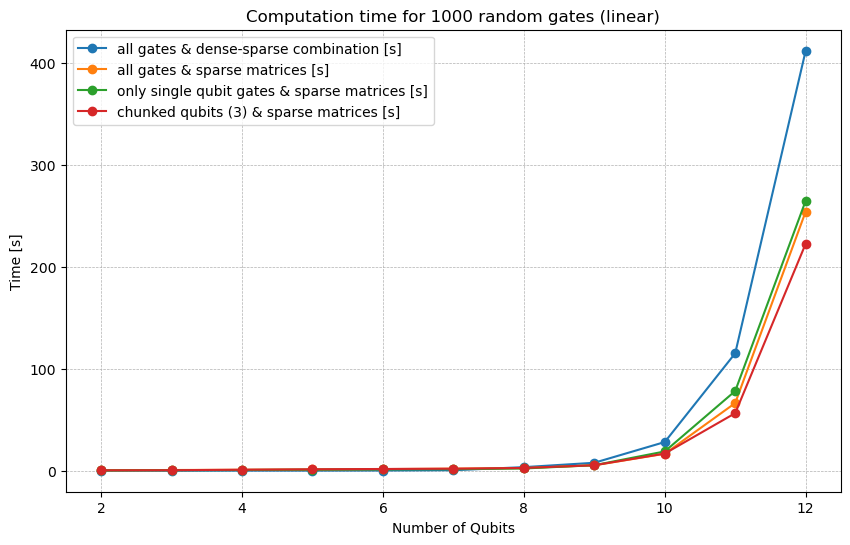

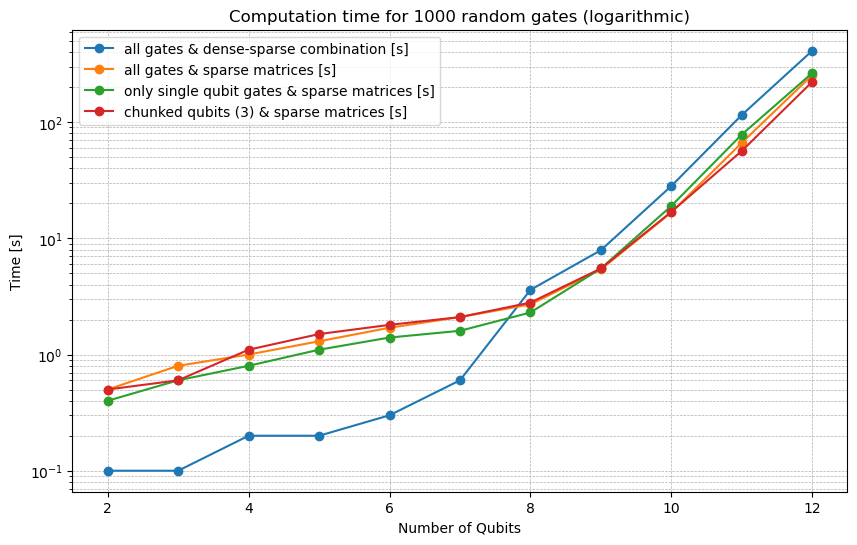

In [19]:
# Data from the table
qubits = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
non_sparse = [0.1, 0.1, 0.2, 0.2, 0.3, 0.6, 3.6, 7.9, 28.2, 115.2,411.6]
all_gates = [0.5, 0.8, 1.0, 1.3, 1.7, 2.1, 2.7, 5.4, 16.7, 66.4, 254.0]
single_qubit_gates = [0.4, 0.6, 0.8, 1.1, 1.4, 1.6, 2.3, 5.5, 19.0, 78.2, 264.6]
chunked_gates = [0.5, 0.6, 1.1, 1.5, 1.8, 2.1, 2.8, 5.5, 16.9, 56.5, 222.5]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(qubits, non_sparse, marker='o', label='all gates & dense-sparse combination [s]')
plt.plot(qubits, all_gates, marker='o', label='all gates & sparse matrices [s]')
plt.plot(qubits, single_qubit_gates, marker='o', label='only single qubit gates & sparse matrices [s]')
plt.plot(qubits, chunked_gates, marker='o', label='chunked qubits (3) & sparse matrices [s]')

# Customize the plot
plt.title("Computation time for 1000 random gates (linear)")
plt.xlabel("Number of Qubits")
plt.ylabel("Time [s]")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# Show the plot
plt.show()


# another log plot
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(qubits, non_sparse, marker='o', label='all gates & dense-sparse combination [s]')
plt.plot(qubits, all_gates, marker='o', label='all gates & sparse matrices [s]')
plt.plot(qubits, single_qubit_gates, marker='o', label='only single qubit gates & sparse matrices [s]')
plt.plot(qubits, chunked_gates, marker='o', label='chunked qubits (3) & sparse matrices [s]')

# Customize the plot
plt.title("Computation time for 1000 random gates (logarithmic)")
plt.xlabel("Number of Qubits")
plt.ylabel("Time [s]")

plt.yscale("log")  # Using logarithmic scale for better visibility of differences

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# Show the plot
plt.show()


# Measurements

### Computational basis measurement

[0.5 0.5 0.5 0.5]
{'00': 257, '01': 268, '10': 237, '11': 238}


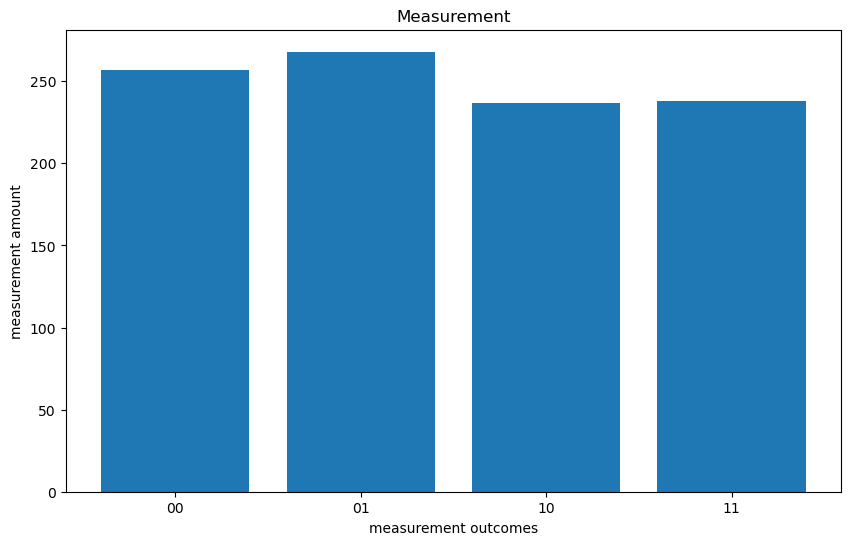

{'00': 0.249, '01': 0.26, '10': 0.236, '11': 0.255}


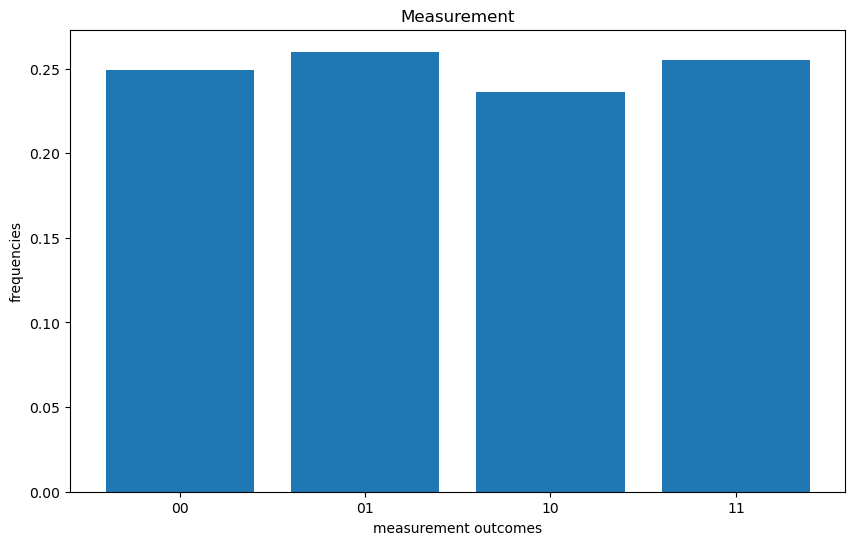

<module 'matplotlib.pyplot' from 'f:\\Programme\\Anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [20]:
# prepare state
state = np.array([1, 0, 0, 0])
instructions = go.create_instruction_list([["H",[1,2]]])
state = reduce(go.apply_instruction, instructions, state)

print(state)

# Measurements
measurements = go.measure_computational(state,2,1000, False)
print(measurements)
go.plot_measurement(measurements,"Measurement","measurement amount")

frequencies = go.measure_computational(state,2,1000)
print(frequencies)
go.plot_measurement(frequencies,"Measurement","frequencies")

### Arbitrary projective measurement

[-2.13321079e-17-5.00000000e-01j  5.00000000e-01-2.13321079e-17j
  5.00000000e-01+2.13321079e-17j -2.13321079e-17+5.00000000e-01j]


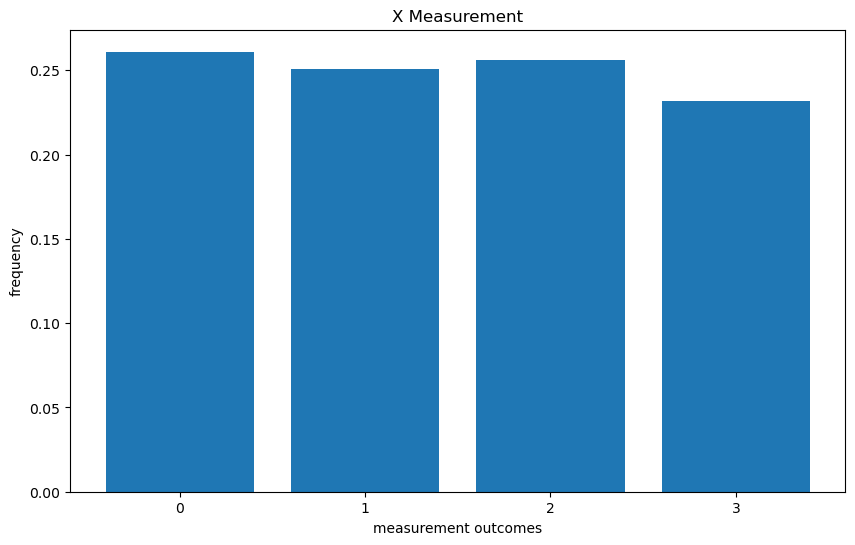

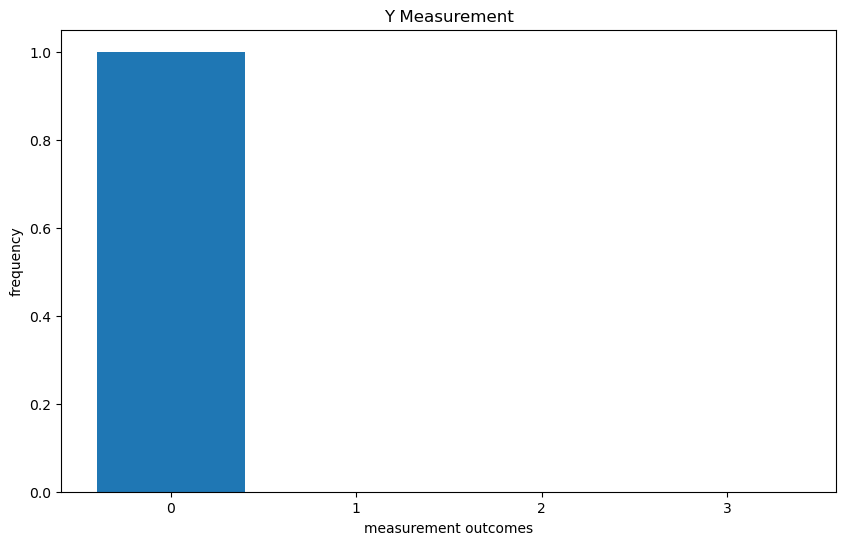

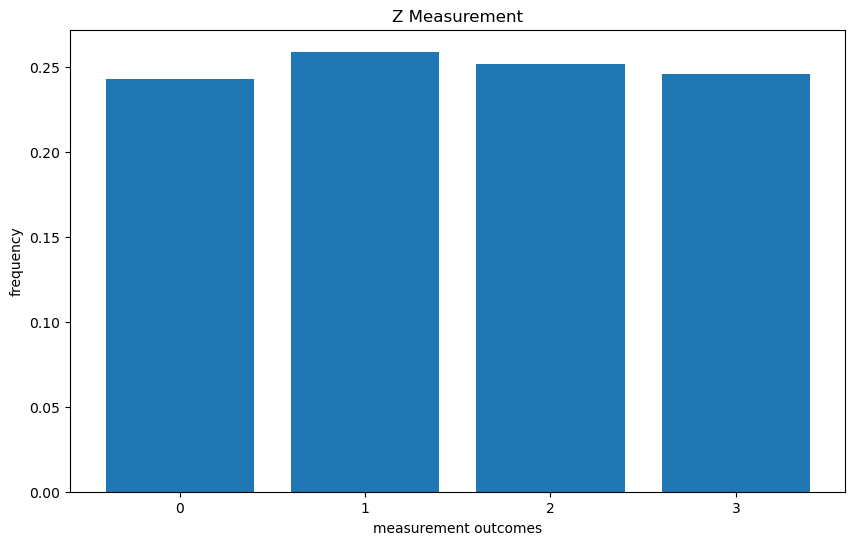

<module 'matplotlib.pyplot' from 'f:\\Programme\\Anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [21]:
# prepare state
state = np.array([1, 0, 0, 0])
instructions = go.create_instruction_list([["H",[1,2]],
                                           ["Rz",[1,2],np.pi/2]])
state = reduce(go.apply_instruction, instructions, state)
print(state)

# Measurement in X basis
x_frequencies = go.measure_projective(state,2,1000, go.P_x(2))
go.plot_measurement(x_frequencies,"X Measurement","frequency")

# Measurement in Y basis
y_frequencies = go.measure_projective(state,2,1000, go.P_y(2))
go.plot_measurement(y_frequencies,"Y Measurement","frequency")

# measurement in Z basis (default)
z_frequencies = go.measure_projective(state,2,1000, go.P_z(2))
go.plot_measurement(z_frequencies,"Z Measurement","frequency")

# Mixed States

### Gates & instructions

In [22]:
# Define a pure state (|ψ⟩ = |000⟩)
pure_state = np.array([1,0,0,0,0,0,0,0])

# Density matrix representation of the pure state
mixed_state = np.outer(pure_state, pure_state.conj())  # ρ = |ψ⟩⟨ψ|

instructions = go.create_instruction_list([["H",[1]],
                                           ["X",[2]],
                                           ["Rx",[2],np.pi],
                                           ["CNOT",[2,1]],
                                           ["R",[3],np.pi,np.array([0,1,0])],
                                           ["T",[1,2,3]]])

# Evolve the states
pure_state =  reduce(go.apply_instruction, instructions, pure_state)
mixed_state = reduce(go.apply_instruction, instructions, mixed_state)

# Reconstruct the density matrix from the evolved state vector
new_mixed_state = np.outer(pure_state, pure_state.conj())

# Check if the evolved density matrices match
print("\nDo the evolved density matrices match?")
print(np.allclose(mixed_state, new_mixed_state))
    


Do the evolved density matrices match?
True


### Plotting mixed states

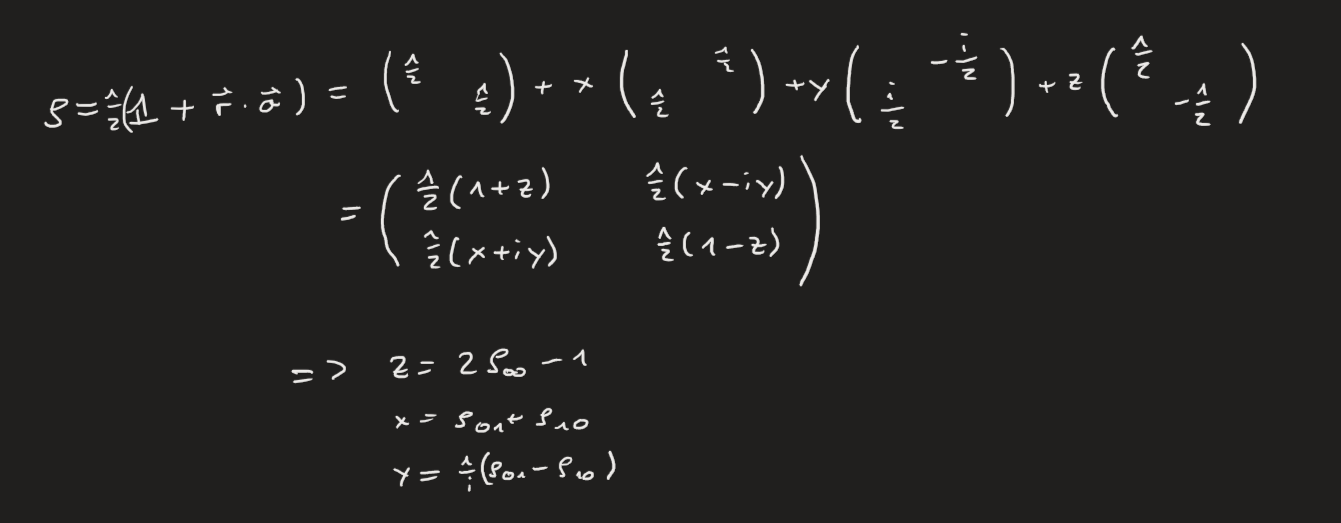

The mixed state is: 
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]


f:\Programme\Anaconda\Lib\site-packages\matplotlib\transforms.py:1865: ComplexWarning: Casting complex values to real discards the imaginary part
  return affine_transform(values, mtx)


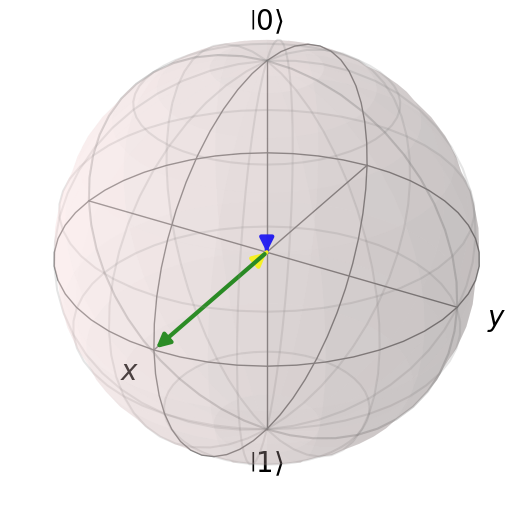

In [23]:
# states
state_1 = np.array([1,0],dtype=complex)
prob_1 = 0.4999999999999
state_2 = np.array([0,1],dtype=complex)
prob_2 = 1 - prob_1
mixed_state = prob_1 * np.outer(state_1, state_1.conj()) + prob_2 * np.outer(state_2, state_2.conj())

state_3 = np.array([1,1],dtype=complex)/np.sqrt(2)
state_4 = np.array([1,-1],dtype=complex)/np.sqrt(2)
mixed_state2 = prob_1 * np.outer(state_3, state_3.conj()) + prob_2 * np.outer(state_4, state_4.conj())

pure_state = np.array([1,1],dtype=complex) / np.sqrt(2)


print("The mixed state is: ")
print(mixed_state)

# create plot
bloch_sphere = qt.Bloch()

# SEQUENCE
go.plot_bloch_state(mixed_state, bloch_sphere, "blue")
go.plot_bloch_state(mixed_state2, bloch_sphere, "yellow")
go.plot_bloch_state(pure_state, bloch_sphere, "green")

bloch_sphere.show()


### Measurements

In [24]:
state = np.array([1,0,1j,1,0,2,3,-3])
state = go.normalization_check(state)

result_z = go.measure_projective(state,3,1000000,go.P_z(3))
result_x = go.measure_projective(state,3,1000000,go.P_x(3))
result_y = go.measure_projective(state,3,1000000,go.P_y(3))
        
mixed_state = np.outer(state, state.conj())

result_z2 = go.measure_projective(mixed_state,3,1000000,go.P_z(3))
result_x2 = go.measure_projective(mixed_state,3,1000000,go.P_x(3))
result_y2 = go.measure_projective(mixed_state,3,1000000,go.P_y(3))

print("Z-basis")
print("pure: " + str(result_z))
print("mixed: " + str(result_z2))
print("X-basis")
print("pure: " + str(result_x))
print("mixed: " +str(result_x2))
print("Y-basis")
print("pure: " +str(result_y))
print("mixed: " + str(result_y2))

Z-basis
pure: {0: 0.039985, 1: 0.0, 2: 0.039888, 3: 0.040056, 4: 0.0, 5: 0.160252, 6: 0.359463, 7: 0.360356}
mixed: {0: 0.039939, 1: 0.0, 2: 0.03997, 3: 0.040084, 4: 0.0, 5: 0.159814, 6: 0.360005, 7: 0.360188}
X-basis
pure: {0: 0.085181, 1: 0.085455, 2: 0.025386, 3: 0.18489, 4: 0.005013, 5: 0.084888, 6: 0.024658, 7: 0.504529}
mixed: {0: 0.08489, 1: 0.085104, 2: 0.024999, 3: 0.184976, 4: 0.005042, 5: 0.08486, 6: 0.025394, 7: 0.504735}
Y-basis
pure: {0: 0.125327, 1: 0.065434, 2: 0.065205, 3: 0.124516, 4: 0.224331, 5: 0.124936, 6: 0.045125, 7: 0.225126}
mixed: {0: 0.124989, 1: 0.065069, 2: 0.065163, 3: 0.125266, 4: 0.224309, 5: 0.125078, 6: 0.044853, 7: 0.225273}


# Experimental: Random states

In [25]:
# Generate a Haar random state in 4 dimensions (for a 2-qubit system)
haar_random_state = go.generate_haar_random_state(4)

print("Haar Random State:")
for key, value in haar_random_state.items():
    print(f"{key}:\n{value}\n")



Haar Random State:
Dimension:
4

Real Part:
[0.8579877138355564, 0.4558195254980082, 1.9204617439063312, 0.048750300660078204]

Imaginary Part:
[1.1965424226581989, -0.19734367326712643, -1.6820828876271692, -0.42317252476345435]

Random Complex Vector:
[(0.8579877138355564+1.1965424226581989j), (0.4558195254980082-0.19734367326712643j), (1.9204617439063312-1.6820828876271692j), (0.048750300660078204-0.42317252476345435j)]

Norm:
3.0188740251461863

Normalized Haar Random State:
[(0.28420785587235925+0.39635387654185317j), (0.15098991269631915-0.06536995966818133j), (0.636151667114806-0.5571888305427769j), (0.0161485044602739-0.14017561555685074j)]

Normalization Check:
0.9999999999999998



In [26]:
# Generate a Hilbert-Schmidt random state in 3 dimensions
hilbert_schmidt_random_state = go.generate_hilbert_schmidt_random_state(3)

print("Hilbert_Schmidt_Random_State:")
for key, value in hilbert_schmidt_random_state.items():
    print(f"{key}:\n{value}\n")

Hilbert_Schmidt_Random_State:
Dimension:
3

Random Complex Matrix G:
[[(1.542845953835866+0.7844861621108741j), (0.38953028593122857-0.3597711943142861j), (-0.8561491593610098+0.24515641673867855j)], [(0.35439282765318086+0.6441659157393234j), (0.44835871589541637+0.9656829998266117j), (-0.2946930520086453-0.08352010213626453j)], [(0.9147152253207298-1.0712536837035496j), (-0.6934873260929367+1.7031387618901106j), (0.4529878068705477-0.15306403992232964j)]]

GG^dagger:
[[(4.070054383469857+0j), (1.1111628796213742-1.3970533910943594j), (-0.7373433511603191+1.9364407010714877j)], [(1.1111628796213742+1.3970533910943594j), (1.7679327999288306+0j), (0.8471560316513755-0.5473735337887005j)], [(-0.7373433511603191-1.9364407010714877j), (0.8471560316513755+0.5473735337887005j), (5.594521265476821+0j)]]

Trace of GG^dagger:
(11.43250844887551+0j)

Normalized Density Matrix (rho):
[[(0.3560071179190935+0j), (0.09719326992762178-0.1222000751052821j), (-0.06449532527857817+0.16938021167716294j)]

In [27]:
# Generate a Bures random state in 3 dimensions
bures_random_state = go.generate_bures_random_state(3)

print("Bures_Random_State:")
for key, value in bures_random_state.items():
    print(f"{key}:\n{value}\n")

Bures_Random_State:
Dimension:
3

Random Complex Matrix G:
[[(0.8473469667132433+1.6175132316874936j), (-0.37458124157614764-1.0383553663033689j), (1.1067073248708534+0.9085977052114919j)], [(-1.550141188445261-0.9906493230612913j), (-0.8732723431920323-0.7180143420726562j), (-0.29975446794564903+0.05488928165619478j)], [(-0.21977768484950563-2.204307503472489j), (-0.6108780523164659-0.8668426892604487j), (-0.5634552997272724+0.2570735225815315j)]]

GG^dagger:
[[(6.603189802792375+0j), (-2.1250985282840316-1.363240456014884j), (-3.0128139855177736+1.0254661136895165j)], [(-2.1250985282840316+1.363240456014884j), (4.755338540496525+0j), (3.8632593936493578-3.4715045016832966j)], [(-3.0128139855177736-1.0254661136895165j), (3.8632593936493578+3.4715045016832966j), (6.415430714152399+0j)]]

Matrix B (I + GG^dagger):
[[(7.603189802792375+0j), (-2.1250985282840316-1.363240456014884j), (-3.0128139855177736+1.0254661136895165j)], [(-2.1250985282840316+1.363240456014884j), (5.755338540496525+0

# Channels

### Bitflip Channel

In [28]:
state = np.array([[1, 0], [0, 0]])
        
instructions = go.create_instruction_list([["bitflip",0.5]])
        
state = reduce(go.apply_instruction, instructions, state)

print(state)

[[0.5 0. ]
 [0.  0.5]]


### Phaseflip Channel

In [29]:
state = np.array([[1j, 1j], [7j, 3+1j]]) 
        
instructions = go.create_instruction_list([["phaseflip",0.7]])
        
state = reduce(go.apply_instruction, instructions, state)

print(state)

[[0.+1.j  0.-0.4j]
 [0.-2.8j 3.+1.j ]]


### Amplitude Damping Channel

In [30]:
state = np.array([[0, 0], [0, 1]])
        
instructions = go.create_instruction_list([["ampdamp",0.4]])
        
state = reduce(go.apply_instruction, instructions, state)

print(state)

[[0.4 0. ]
 [0.  0.6]]


### Depolarizing Channel

In [31]:
state = np.array([[0,0,0,0,0,0,0,1]])

state = np.outer(state, state.conj())

instructions = go.create_instruction_list([["depol",0.5]])
        
state = reduce(go.apply_instruction, instructions, state)

print(state)

[[0.25+0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.25+0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.25+0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.25+0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.25+0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.25+0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.25+0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.75+0.j]]


# Deutsch-Josza Algorithm

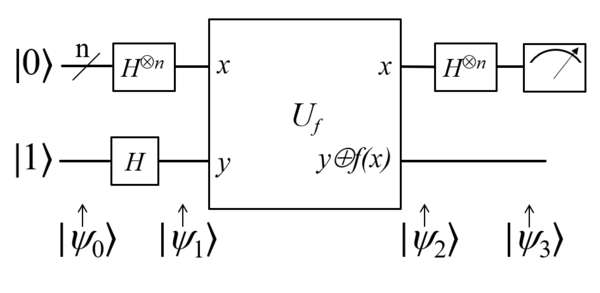

In [39]:
# The black box function. Is it constant or balanced??
from deutsch_josza_black_box import black_box

bits = 3

# vector computation
if go.deutsch_josza(black_box, bits) == 1:
    print(str(bits) + ": function is constant")
else:
    print(str(bits) + ": function is balanced")

# density matrix computation
if go.deutsch_josza_noise(black_box, bits) == 1:
    print(str(bits) + ": function is constant")
else:
    print(str(bits) + ": function is balanced")

3: function is constant
3: function is constant


Results:

1: function is balanced

2: function is balanced

3: function is constant

4: function is balanced

5: function is constant

6: function is constant

7: function is balanced

8: function is balanced

9: function is constant

10: function is constant